**1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.**

For multiplying a matrix of dimensions n x k by a matrix of dimensions **k x m**, the resulting product matrix will have dimensions **n x m**. The calculation of each element in this product matrix requires a specific number of multiplications and additions. Specifically, to determine each of the **n x m** elements, a dot product operation is performed between a row of the first matrix and a column of the second matrix. This dot product involves **k** individual multiplications and **k-1** additions. Therefore, the total number of multiplications needed for the entire matrix multiplication process is **n x m x k**, while the total number of additions amounts to **n x m x (k-1)**.

**2. Write Python code to multiply the above two matrices. Solve using a list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [3]:
import time
import numpy as np

def get_matrix_dimensions():
    """Gets the dimensions n, k, m for matrix multiplication from the user."""
    while True:
        try:
            n = int(input("Enter the number of rows for matrix A (n): "))
            k = int(input("Enter the number of columns for matrix A (k), which is also the number of rows for matrix B: "))
            m = int(input("Enter the number of columns for matrix B (m): "))
            if n > 0 and k > 0 and m > 0:
                return n, k, m
            else:
                print("Dimensions must be positive integers. Please try again.")
        except ValueError:
            print("Invalid input. Please enter integer values.")

def create_random_matrix(rows, cols, max_val=10):
    """Creates a random matrix of given dimensions."""
    return [[np.random.randint(0, max_val) for _ in range(cols)] for _ in range(rows)]

def matrix_multiply_lists(matrix1, matrix2):
    if len(matrix1[0]) != len(matrix2):
        raise ValueError("Number of columns in the first matrix must equal number of rows in the second matrix.")

    rows_a = len(matrix1)
    cols_a = len(matrix1[0])
    rows_b = len(matrix2)
    cols_b = len(matrix2[0])

    result = [[0 for _ in range(cols_b)] for _ in range(rows_a)]

    for i in range(rows_a):
        for j in range(cols_b):
            for x in range(cols_a):
                result[i][j] += matrix1[i][x] * matrix2[x][j]
    return result

n, k, m = get_matrix_dimensions()

matrix_a_list = create_random_matrix(n, k)
matrix_b_list = create_random_matrix(k, m)

start_time_list = time.perf_counter()
result_list = matrix_multiply_lists(matrix_a_list, matrix_b_list)
end_time_list = time.perf_counter()
time_taken_list = end_time_list - start_time_list

start_time_numpy = time.perf_counter()
matrix_a_numpy = np.array(matrix_a_list)
matrix_b_numpy = np.array(matrix_b_list)
result_numpy = np.dot(matrix_a_numpy, matrix_b_numpy)
end_time_numpy = time.perf_counter()
time_taken_numpy = end_time_numpy - start_time_numpy

print(f"\nTime taken with list of lists: {time_taken_list:.6f} seconds")
print(f"Time taken with NumPy: {time_taken_numpy:.6f} seconds")

if time_taken_numpy > 0:
    print(f"NumPy is approximately {time_taken_list / time_taken_numpy:.2f} times faster.")


Enter the number of rows for matrix A (n):  5
Enter the number of columns for matrix A (k), which is also the number of rows for matrix B:  6
Enter the number of columns for matrix B (m):  5



Time taken with list of lists: 0.000083 seconds
Time taken with NumPy: 0.000195 seconds
NumPy is approximately 0.43 times faster.


**3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?**

In [4]:
import time
import numpy as np
import random

def get_nums_count():
    while True:
        try:
            count = int(input("Enter number of elements for array: "))
            if count > 0:
                return count
            else:
                print("Count must be positive. Try again.")
        except ValueError:
            print("Invalid input. Enter a whole number.")

def create_nums(count):
    nums = []
    for _ in range(count):
        nums.append(random.randint(0, 10000))
    return nums

def find_median_slow(arr):
    n = len(arr)
    if n == 0:
        raise ValueError("Empty array.")

    temp = list(arr)
    
    for _ in range(n // 2 + 1):
        max_val = -float('inf')
        max_index = -1
        
        for i in range(len(temp)):
            if temp[i] > max_val:
                max_val = temp[i]
                max_index = i
        
        temp.pop(max_index)
        
    found_elements = sorted(arr, reverse=True)[:n//2+1]

    if n % 2 == 1:
        return float(found_elements[-1])
    else:
        return (float(found_elements[-1]) + float(found_elements[-2])) / 2.0

def find_median_fast(arr):
    n = len(arr)
    if n == 0:
        raise ValueError("Empty array.")
    
    arr.sort() 
    
    if n % 2 == 1:
        return float(arr[n // 2])
    else:
        mid1 = arr[n // 2 - 1]
        mid2 = arr[n // 2]
        return (float(mid1) + float(mid2)) / 2.0

array_size = get_nums_count()
my_array = create_nums(array_size)

start_time_slow = time.perf_counter()
median_slow = find_median_slow(my_array.copy())
end_time_slow = time.perf_counter()
time_slow = end_time_slow - start_time_slow

start_time_fast = time.perf_counter()
median_fast = find_median_fast(my_array.copy())
end_time_fast = time.perf_counter()
time_fast = end_time_fast - start_time_fast

start_time_numpy = time.perf_counter()
median_numpy = np.median(my_array)
end_time_numpy = time.perf_counter()
time_numpy = end_time_numpy - start_time_numpy

print(f"\nMedian (Slow Method): {median_slow:.2f}")
print(f"Time (Slow Method): {time_slow:.6f} seconds")

print(f"\nMedian (Fast Method): {median_fast:.2f}")
print(f"Time (Fast Method): {time_fast:.6f} seconds")

print(f"\nMedian (NumPy Method): {median_numpy:.2f}")
print(f"Time (NumPy Method): {time_numpy:.6f} seconds")


Enter number of elements for array:  5



Median (Slow Method): 6735.00
Time (Slow Method): 0.000113 seconds

Median (Fast Method): 6735.00
Time (Fast Method): 0.000080 seconds

Median (NumPy Method): 6735.00
Time (NumPy Method): 0.002830 seconds


**4. What is the gradient of the following function with respect to x and y?
x^2y + y^3(sin(x)) m**

**Gradient of a Multivariable Function**

**Problem Statement**


Find the gradient of the following function with respect to $x$ and $y$:
$$ f(x, y) = x^2y + y^3 \sin(x) $$

**Understanding the Gradient**

The gradient of a scalar-valued multivariable function, denoted as $\nabla f$ or $\text{grad } f$, is a vector that contains all of its partial derivatives. For a function $f(x, y)$ of two variables, the gradient is given by:

$$ \nabla f(x, y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) $$

This vector points in the direction of the greatest rate of increase of the function at a given point, and its magnitude represents the maximum rate of increase.

**Calculating Partial Derivatives**

To find the gradient, the partial derivatives of $f(x, y)$ with respect to $x$ and $y$ must be calculated.

### 1. Partial Derivative with respect to $x$ ($\frac{\partial f}{\partial x}$)

When calculating the partial derivative with respect to $x$, treat $y$ as a constant.
For $f(x, y) = x^2y + y^3 \sin(x)$:
- The partial derivative of $x^2y$ with respect to $x$ is $2xy$ (treating $y$ as a constant).
- The partial derivative of $y^3 \sin(x)$ with respect to $x$ is $y^3 \cos(x)$ (treating $y^3$ as a constant).

Combining these gives:
$$ \frac{\partial f}{\partial x} = 2xy + y^3 \cos(x) $$

### 2. Partial Derivative with respect to $y$ ($\frac{\partial f}{\partial y}$)

When calculating the partial derivative with respect to $y$, treat $x$ as a constant.
For $f(x, y) = x^2y + y^3 \sin(x)$:
- The partial derivative of $x^2y$ with respect to $y$ is $x^2$ (treating $x^2$ as a constant).
- The partial derivative of $y^3 \sin(x)$ with respect to $y$ is $3y^2 \sin(x)$ (treating $\sin(x)$ as a constant).

Combining these gives:
$$ \frac{\partial f}{\partial y} = x^2 + 3y^2 \sin(x) $$

## The Gradient Vector

Combine the partial derivatives to form the gradient vector:

$$ \nabla f(x, y) = \left( 2xy + y^3 \cos(x), x^2 + 3y^2 \sin(x) \right) $$

Alternatively, using unit vectors $\mathbf{i}$ and $\mathbf{j}$:

$$ \nabla f(x, y) = (2xy + y^3 \cos(x))\mathbf{i} + (x^2 + 3y^2 \sin(x))\mathbf{j} $$


**5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y**

In [21]:
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

def analytical_grad_x(x, y):
    return 2 * x * y + y**3 * jnp.cos(x)

def analytical_grad_y(x, y):
    return x**2 + 3 * y**2 * jnp.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))

key = jax.random.PRNGKey(0)

print("JAX Gradient vs Analytical Gradient Comparison")
for i in range(5):
    key, subkey1, subkey2 = jax.random.split(key, 3)
    x_val = jax.random.uniform(subkey1, minval=-5.0, maxval=5.0)
    y_val = jax.random.uniform(subkey2, minval=-5.0, maxval=5.0)

    jax_grad_x, jax_grad_y = grad_f(x_val, y_val)
    
    an_grad_x = analytical_grad_x(x_val, y_val)
    an_grad_y = analytical_grad_y(x_val, y_val)

    print(f"\nTest {i+1}:")
    print(f"x = {x_val:.4f}, y = {y_val:.4f}")
    print(f"JAX grad_x = {jax_grad_x:.6f}, Analytical grad_x = {an_grad_x:.6f}")
    print(f"JAX grad_y = {jax_grad_y:.6f}, Analytical grad_y = {an_grad_y:.6f}")

    np.testing.assert_allclose(jax_grad_x, an_grad_x, atol=1e-5)
    np.testing.assert_allclose(jax_grad_y, an_grad_y, atol=1e-5)
    print("Gradients match (within tolerance).")

JAX Gradient vs Analytical Gradient Comparison

Test 1:
x = -4.9271, y = 4.0245
JAX grad_x = -25.772076, Analytical grad_x = -25.772076
JAX grad_y = 71.750298, Analytical grad_y = 71.750298
Gradients match (within tolerance).

Test 2:
x = -3.9571, y = -2.7152
JAX grad_x = 35.209358, Analytical grad_x = 35.209358
JAX grad_y = 31.760717, Analytical grad_y = 31.760717
Gradients match (within tolerance).

Test 3:
x = -4.1740, y = -3.9459
JAX grad_x = 64.445732, Analytical grad_x = 64.445732
JAX grad_y = 57.524204, Analytical grad_y = 57.524204
Gradients match (within tolerance).

Test 4:
x = -4.8934, y = -1.6246
JAX grad_x = 15.127936, Analytical grad_x = 15.127936
JAX grad_y = 31.734219, Analytical grad_y = 31.734219
Gradients match (within tolerance).

Test 5:
x = -3.4489, y = 4.7099
JAX grad_x = -132.072388, Analytical grad_x = -132.072388
JAX grad_y = 32.029003, Analytical grad_y = 32.029003
Gradients match (within tolerance).


**6. Use sympy to confirm that you obtain the same gradient analytically.**

In [6]:
import sympy as sp

x, y = sp.symbols('x y')

f_sym = x**2 * y + y**3 * sp.sin(x)

df_dx_sym = sp.diff(f_sym, x)
df_dy_sym = sp.diff(f_sym, y)

print("SymPy df/dx:")
print(df_dx_sym)

print("SymPy df/dy:")
print(df_dy_sym)

analytical_grad_x_expr = 2*x*y + y**3*sp.cos(x)
analytical_grad_y_expr = x**2 + 3*y**2*sp.sin(x)

print(f"\nAnalytical df/dx: {analytical_grad_x_expr}")
print(f"SymPy df/dx:      {df_dx_sym}")

print(f"Analytical df/dy: {analytical_grad_y_expr}")
print(f"SymPy df/dy:      {df_dy_sym}")

print(f"\ndf/dx matches: {sp.Eq(df_dx_sym, analytical_grad_x_expr)}")
print(f"df/dy matches: {sp.Eq(df_dy_sym, analytical_grad_y_expr)}")


SymPy df/dx:
2*x*y + y**3*cos(x)
SymPy df/dy:
x**2 + 3*y**2*sin(x)

Analytical df/dx: 2*x*y + y**3*cos(x)
SymPy df/dx:      2*x*y + y**3*cos(x)
Analytical df/dy: x**2 + 3*y**2*sin(x)
SymPy df/dy:      x**2 + 3*y**2*sin(x)

df/dx matches: True
df/dy matches: True


**7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2**

In [7]:
student_records = {
    2022: {
        "Branch 1": {
            1: {"Name": "Aarav", "Marks": {"Maths": 95, "English": 88, "Physics": 92}},
            2: {"Name": "Ishaan", "Marks": {"Maths": 78, "English": 65, "Physics": 70}},
        },
        "Branch 2": {
            10: {"Name": "Diya", "Marks": {"Maths": 85, "Chemistry": 90, "Biology": 80}},
            11: {"Name": "Kiara", "Marks": {"Maths": 70, "Chemistry": 75, "Biology": 68}},
        },
    },
    2023: {
        "Branch 1": {
            3: {"Name": "Vivaan", "Marks": {"Maths": 90, "English": 80, "Physics": 85}},
            4: {"Name": "Arjun", "Marks": {"Maths": 72, "English": 75, "Physics": 69}},
        },
        "Branch 2": {
            12: {"Name": "Ananya", "Marks": {"Maths": 88, "Chemistry": 85, "Biology": 90}},
            13: {"Name": "Shreya", "Marks": {"Maths": 65, "Chemistry": 70, "Biology": 72}},
        },
    },
    2024: {
        "Branch 1": {},
        "Branch 2": {
            14: {"Name": "Riya", "Marks": {"Maths": 98, "Chemistry": 95, "Biology": 99}},
        },
    },
    2025: {
        "Branch 1": {},
        "Branch 2": {},
    },
}

aarav_math_marks = student_records[2022]["Branch 1"][1]["Marks"]["Maths"]
print(f"Aarav's Maths marks in 2022, Branch 1: {aarav_math_marks}")

diya_name = student_records[2022]["Branch 2"][10]["Name"]
print(f"Student with Roll Number 10 in 2022, Branch 2: {diya_name}")

ishaan_marks = student_records[2022]["Branch 1"][2]["Marks"]
print(f"Ishaan's marks in 2022, Branch 1: {ishaan_marks}")

print("\n2023 Student Records:")
for branch, students in student_records[2023].items():
    print(f"  {branch}:")
    for roll_no, details in students.items():
        print(f"    Roll: {roll_no}, Name: {details['Name']}, Marks: {details['Marks']}")

student_records[2024]["Branch 1"][5] = {"Name": "Dev", "Marks": {"Maths": 82, "English": 75}}
print(f"\nAdded Dev to 2024, Branch 1: {student_records[2024]['Branch 1'][5]}")

student_records[2024]["Branch 2"][14]["Marks"]["Chemistry"] = 97
print(f"Riya's updated Chemistry marks: {student_records[2024]['Branch 2'][14]['Marks']['Chemistry']}")


Aarav's Maths marks in 2022, Branch 1: 95
Student with Roll Number 10 in 2022, Branch 2: Diya
Ishaan's marks in 2022, Branch 1: {'Maths': 78, 'English': 65, 'Physics': 70}

2023 Student Records:
  Branch 1:
    Roll: 3, Name: Vivaan, Marks: {'Maths': 90, 'English': 80, 'Physics': 85}
    Roll: 4, Name: Arjun, Marks: {'Maths': 72, 'English': 75, 'Physics': 69}
  Branch 2:
    Roll: 12, Name: Ananya, Marks: {'Maths': 88, 'Chemistry': 85, 'Biology': 90}
    Roll: 13, Name: Shreya, Marks: {'Maths': 65, 'Chemistry': 70, 'Biology': 72}

Added Dev to 2024, Branch 1: {'Name': 'Dev', 'Marks': {'Maths': 82, 'English': 75}}
Riya's updated Chemistry marks: 97


**8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.**

In [22]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def display(self):
        print(f"    Roll Number: {self.roll_number}, Name: {self.name}")
        print(f"      Marks: {self.marks}")


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def display(self):
        print(f"  Branch: {self.name}")
        for student in self.students:
            student.display()


class Year:
    def __init__(self, year_num):
        self.year_num = year_num
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def display(self):
        print(f"Year: {self.year_num}")
        for branch in self.branches:
            branch.display()


db = []

year_2022 = Year(2022)

branch1_2022 = Branch("Branch 1")
branch1_2022.add_student(Student(1, "Aarav", {"Maths": 95, "English": 88, "Physics": 92}))
branch1_2022.add_student(Student(2, "Ishaan", {"Maths": 78, "English": 65, "Physics": 70}))
year_2022.add_branch(branch1_2022)

branch2_2022 = Branch("Branch 2")
branch2_2022.add_student(Student(10, "Diya", {"Maths": 85, "Chemistry": 90, "Biology": 80}))
year_2022.add_branch(branch2_2022)

db.append(year_2022)

year_2023 = Year(2023)

branch1_2023 = Branch("Branch 1")
branch1_2023.add_student(Student(3, "Vivaan", {"Maths": 90, "English": 80, "Physics": 85}))
year_2023.add_branch(branch1_2023)

db.append(year_2023)

print("--- Student Database ---")
for year in db:
    year.display()


--- Student Database ---
Year: 2022
  Branch: Branch 1
    Roll Number: 1, Name: Aarav
      Marks: {'Maths': 95, 'English': 88, 'Physics': 92}
    Roll Number: 2, Name: Ishaan
      Marks: {'Maths': 78, 'English': 65, 'Physics': 70}
  Branch: Branch 2
    Roll Number: 10, Name: Diya
      Marks: {'Maths': 85, 'Chemistry': 90, 'Biology': 80}
Year: 2023
  Branch: Branch 1
    Roll Number: 3, Name: Vivaan
      Marks: {'Maths': 90, 'English': 80, 'Physics': 85}


**9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.**

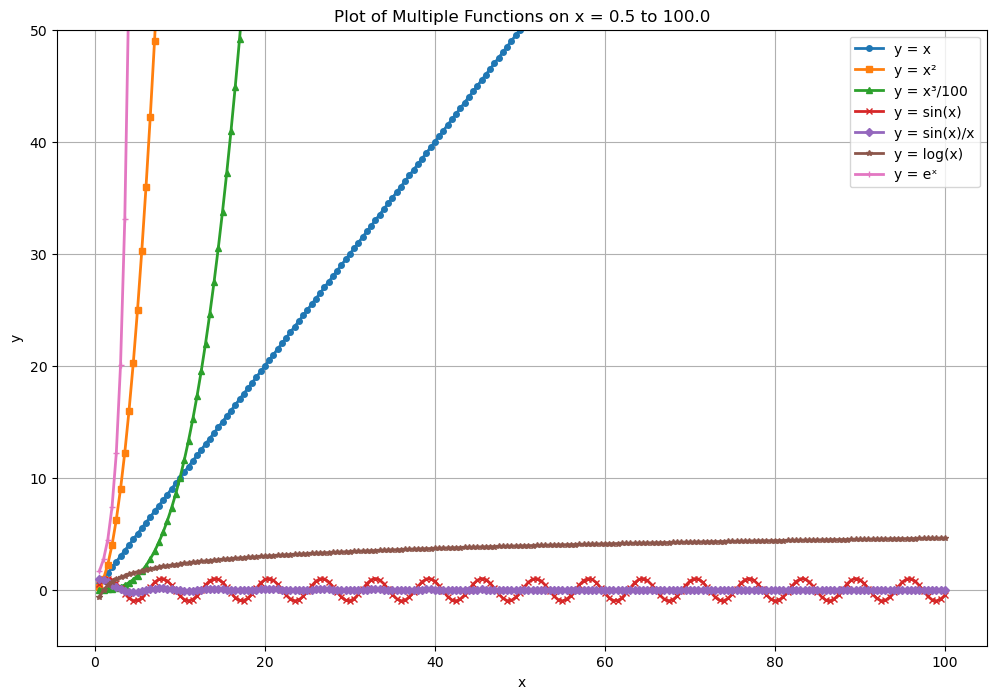

In [14]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5, 100.0, 200)

y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

plt.figure(figsize=(12, 8))

plt.plot(x, y1, label='y = x', linewidth=2, marker='o', markersize=4)
plt.plot(x, y2, label='y = x²', linewidth=2, marker='s', markersize=4)
plt.plot(x, y3, label='y = x³/100', linewidth=2, marker='^', markersize=4)
plt.plot(x, y4, label='y = sin(x)', linewidth=2, marker='x', markersize=4)
plt.plot(x, y5, label='y = sin(x)/x', linewidth=2, marker='D', markersize=4)
plt.plot(x, y6, label='y = log(x)', linewidth=2, marker='*', markersize=4)
plt.plot(x, y7, label='y = eˣ', linewidth=2, marker='+', markersize=4)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Multiple Functions on x = 0.5 to 100.0')
plt.legend()
plt.grid(True)

plt.ylim(-5, 50)

plt.show()


**10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.**

In [15]:
import numpy as np
import pandas as pd

matrix_data = np.random.uniform(low=1, high=2, size=(20, 5))

df = pd.DataFrame(matrix_data, columns=['a', 'b', 'c', 'd', 'e'])

column_std = df.std()
highest_std_column = column_std.idxmax()
highest_std_value = column_std.max()

row_mean = df.mean(axis=1)
lowest_mean_row_index = row_mean.idxmin()
lowest_mean_row_value = row_mean.min()
lowest_mean_row_data = df.loc[lowest_mean_row_index]

print("DataFrame created:")
print(df)
print("\nColumn with the highest standard deviation:")
print(f"Column Name: '{highest_std_column}' with Standard Deviation: {highest_std_value:.4f}")
print("\nRow with the lowest mean:")
print(f"Row Index: {lowest_mean_row_index} with Mean: {lowest_mean_row_value:.4f}")
print("Row Data:")
print(lowest_mean_row_data)


DataFrame created:
           a         b         c         d         e
0   1.744497  1.370576  1.970632  1.852640  1.694793
1   1.136635  1.113638  1.687185  1.294825  1.465433
2   1.250093  1.713835  1.902331  1.292162  1.723887
3   1.463740  1.366894  1.456608  1.208874  1.279310
4   1.780906  1.960265  1.498164  1.082808  1.242543
5   1.781311  1.985797  1.097323  1.520487  1.252535
6   1.969422  1.896056  1.373515  1.139299  1.010108
7   1.077981  1.281276  1.855768  1.520669  1.263936
8   1.684423  1.224414  1.255844  1.011746  1.077658
9   1.653206  1.747425  1.085737  1.938749  1.279874
10  1.345967  1.387866  1.845919  1.861754  1.227019
11  1.315697  1.774538  1.100282  1.812982  1.958516
12  1.670678  1.742699  1.010382  1.548138  1.847449
13  1.454081  1.790713  1.169508  1.458678  1.157538
14  1.970250  1.567958  1.643294  1.550193  1.704839
15  1.363380  1.257945  1.101282  1.258843  1.855767
16  1.463715  1.518980  1.858134  1.951015  1.164530
17  1.567281  1.686241  1.9

**11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.**

In [16]:
import numpy as np
import pandas as pd

matrix_data = np.random.uniform(low=1, high=2, size=(20, 5))

df = pd.DataFrame(matrix_data, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_lt8_rows = df[df['g'] == 'LT8'].shape

std_f_lt8 = df[df['g'] == 'LT8']['f'].std()
std_f_gt8 = df[df['g'] == 'GT8']['f'].std()

print("DataFrame after adding 'f' and 'g' columns:")
print(df)
print(f"\nNumber of rows where 'g' is 'LT8': {num_lt8_rows}")
print(f"Standard deviation of 'f' for 'LT8' rows: {std_f_lt8:.4f}")
print(f"Standard deviation of 'f' for 'GT8' rows: {std_f_gt8:.4f}")


DataFrame after adding 'f' and 'g' columns:
           a         b         c         d         e         f    g
0   1.351291  1.637858  1.022460  1.241058  1.175870  6.428537  LT8
1   1.546297  1.302076  1.210971  1.404788  1.495956  6.960087  LT8
2   1.606173  1.024493  1.768751  1.084102  1.169553  6.653072  LT8
3   1.232195  1.942812  1.335238  1.059670  1.598263  7.168178  LT8
4   1.915621  1.608490  1.083210  1.956840  1.969137  8.533299  GT8
5   1.345945  1.292065  1.270875  1.843048  1.995148  7.747080  LT8
6   1.930321  1.349578  1.600425  1.060323  1.521509  7.462156  LT8
7   1.556945  1.940011  1.264234  1.555303  1.536795  7.853288  LT8
8   1.047645  1.717157  1.354110  1.720907  1.714874  7.554693  LT8
9   1.245436  1.047490  1.002643  1.340962  1.115001  5.751532  LT8
10  1.999422  1.995518  1.226890  1.737438  1.193395  8.152663  GT8
11  1.535493  1.858492  1.008648  1.105719  1.360414  6.868766  LT8
12  1.777334  1.350609  1.684458  1.107299  1.259972  7.179672  LT8
13  

**12. Write a small piece of code to explain broadcasting in numpy.**

In [17]:
import numpy as np

data_matrix = np.array([[10, 20, 30],
                       [40, 50, 60],
                       [70, 80, 90]])

scaling_factors = np.array([2, 0.5, 3])

scaled_data = data_matrix * scaling_factors[np.newaxis, :]

print("Original 2D Data Matrix:\n", data_matrix)
print("\nScaling Factors (1D array):", scaling_factors)
print("\nScaled Data (after broadcasting multiplication):\n", scaled_data)


Original 2D Data Matrix:
 [[10 20 30]
 [40 50 60]
 [70 80 90]]

Scaling Factors (1D array): [2.  0.5 3. ]

Scaled Data (after broadcasting multiplication):
 [[ 20.  10.  90.]
 [ 80.  25. 180.]
 [140.  40. 270.]]


**13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.**


In [19]:
import numpy as np

def custom_argmin(arr):
    if arr.size == 0:
        raise ValueError("Input array must not be empty.")

    min_value = arr[0]
    min_index = 0

    for i in range(1, arr.size):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
            
    return min_index

data_array = np.array([4, 1, 9, 2, 7, 5])

my_argmin_index = custom_argmin(data_array)

numpy_argmin_index = np.argmin(data_array)

print(f"Original array: {data_array}")
print(f"Index of minimum element (custom_argmin): {my_argmin_index}")
print(f"Index of minimum element (np.argmin): {numpy_argmin_index}")

data_array_2 = np.array([10, -5, 20, 3, -8, 15])
my_argmin_index_2 = custom_argmin(data_array_2)
numpy_argmin_index_2 = np.argmin(data_array_2)

print(f"\nOriginal array 2: {data_array_2}")
print(f"Index of minimum element (custom_argmin): {my_argmin_index_2}")
print(f"Index of minimum element (np.argmin): {numpy_argmin_index_2}")

data_array_3 = np.array([3, 1, 5, 1, 2])
my_argmin_index_3 = custom_argmin(data_array_3)
numpy_argmin_index_3 = np.argmin(data_array_3)

print(f"\nOriginal array 3: {data_array_3}")
print(f"Index of minimum element (custom_argmin): {my_argmin_index_3}")
print(f"Index of minimum element (np.argmin): {numpy_argmin_index_3}")


Original array: [4 1 9 2 7 5]
Index of minimum element (custom_argmin): 1
Index of minimum element (np.argmin): 1

Original array 2: [10 -5 20  3 -8 15]
Index of minimum element (custom_argmin): 4
Index of minimum element (np.argmin): 4

Original array 3: [3 1 5 1 2]
Index of minimum element (custom_argmin): 1
Index of minimum element (np.argmin): 1
